# GRIP:The Sparks Foundation

Data Science and Business Analytics

To Predict the percentage of marks of the students based on the number of hours they studied 

 Author: RISHITA ATHIYANNAN

TASK 1:Prediction using Supervised ML

In [6]:
#importing libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
#reading data from link
url="http://bit.ly/w-data"
studentdata=pd.read_csv(url)
print("Data imported successfully")
studentdata.head(11)


Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Data visualisation

In [10]:
#to find the number of rows and columns
studentdata.shape

(25, 2)

In [21]:
#to find the column names
studentdata.columns

Index(['Hours', 'Scores'], dtype='object')

In [15]:
#to get null values if any
studentdata.isnull==True

False

In [20]:
#to get the datatypes
studentdata.dtypes

Hours     float64
Scores      int64
dtype: object

In [12]:
#to get the complete information of the dataset
studentdata.info

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [35]:
#to describe the data
studentdata.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

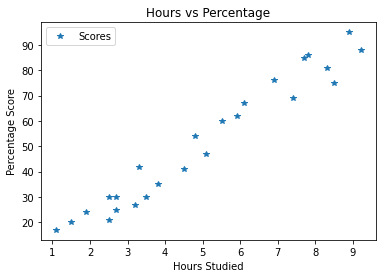

In [22]:
# Plotting the distribution of scores
studentdata.plot(x='Hours', y='Scores', style='*')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

## TRAINING THIS MODEL

In [26]:
#dividing the  model into "attributes" and "labels"(columns and rows respectively)
x = studentdata.iloc[:, :-1].values  
y = studentdata.iloc[:, 1].values 
print(x)
print(y)


[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [27]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0) 

In [28]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


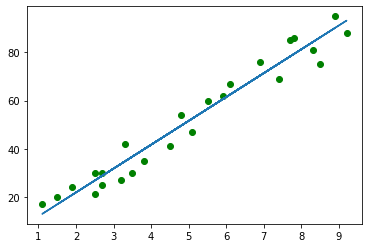

In [42]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_
# Plotting for the test data
plt.scatter(x, y,color="green")
plt.plot(x, line);
plt.show()

# Making predictions

In [31]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [33]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
print(df) 

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


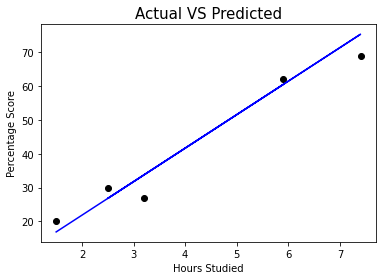

In [51]:
plt.scatter(x=x_test,y=y_test,color='black')
plt.plot(x_test,y_pred,color='blue')
plt.title('Actual VS Predicted',size=15)
plt.ylabel('Percentage Score',size=10)
plt.xlabel('Hours Studied',size=10)
plt.show()

# Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [52]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


small value of mean absolute error states that the chances of error through thev model is very less

# What will be the predicted score if the student studies for 9.25 hrs/day?

In [55]:
predicting_score=regressor.predict([[9.25]])
predicting_score

array([93.69173249])

In [59]:
print("Predicted Score = {}".format(round(predicting_score[0],2)))

Predicted Score = 93.69


therefore, according to the regression, if the student studies for 9.25 hrs/day he/she would likely score 93.69 marks